#시계열자료분석

## CH04 분해법 -01

###패키지설치

In [1]:
install.packages("forecast")
install.packages("TTR")
install.packages("lmtest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
library(forecast)
library(TTR)
library(lmtest)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




In [3]:
options(repr.plot.width=15,repre.plot.height=8)

###추세를 이용한 분해법 - 가법모형

- $Z_t=T_t+S_t+I_t$   계절주기:s

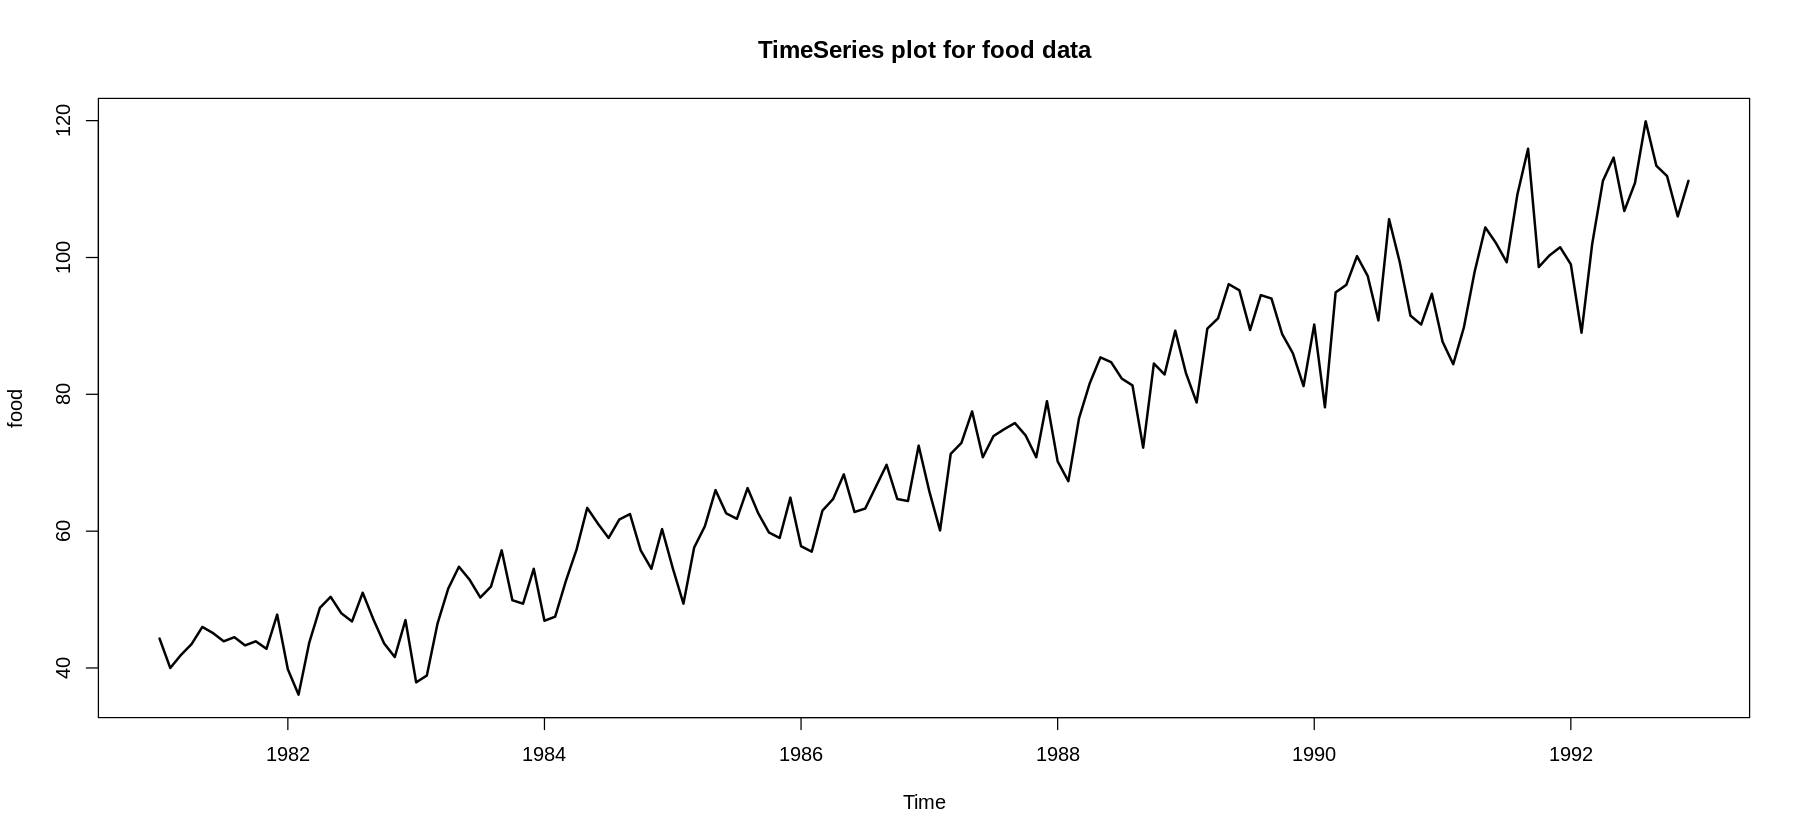

In [5]:
z=scan("food.txt")
t=1:length(z)
food=ts(z,start=c(1981,1),frequency=12)

plot.ts(food,lwd=2,main="TimeSeries plot for food data")

- 추세와 계절성분이 존재
- 데이터에서 이분산성이 보임. 즉, 시간에 따라 계절 변동의 진폭이 증가함
- 가법모형을 사용하기 위해 log 변환 실행

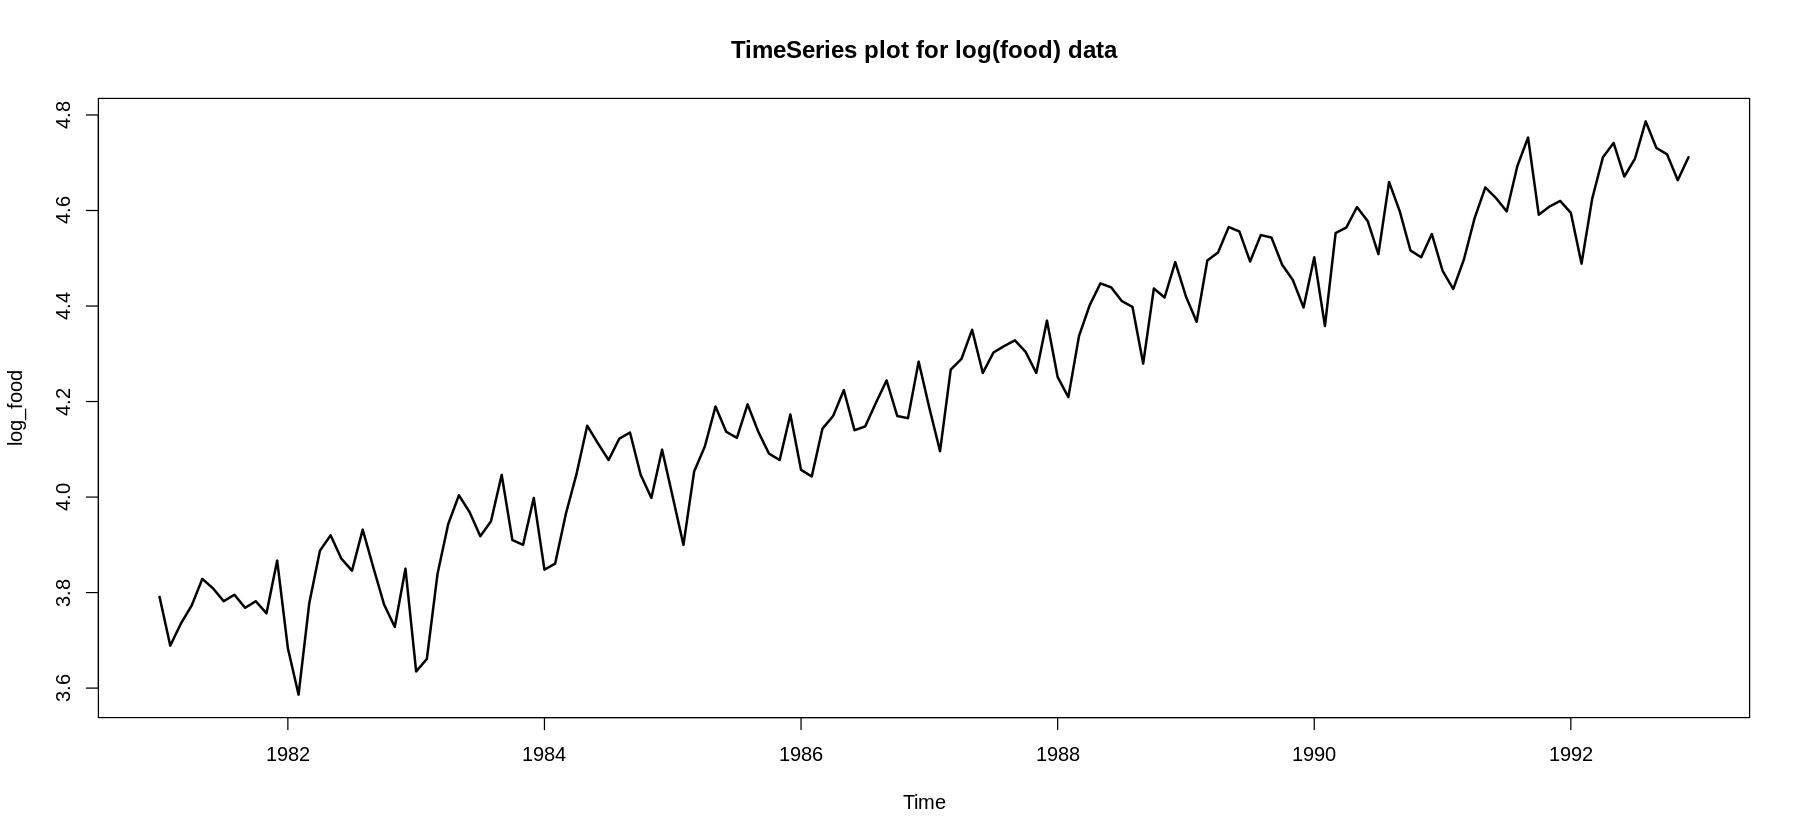

In [6]:
##이분산성 제거를 위한 변수 변환
log_food=log(food)
plot.ts(log_food,lwd=2,main="TimeSeries plot for log(food) data")

- 진폭이 시간의 흐름에 따라 거의 일정해짐 -> 이분산성 문제 해결

### 1. 추세 성분 추정
$Z_t=β_0+β_1t+ϵ_t$ 적합

In [7]:
fit=lm(log_food~t)
summary(fit)


Call:
lm(formula = log_food ~ t)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.251154 -0.042190  0.009368  0.051058  0.147910 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3.705715   0.012870  287.94   <2e-16 ***
t           0.007216   0.000154   46.86   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.07682 on 142 degrees of freedom
Multiple R-squared:  0.9393,	Adjusted R-squared:  0.9388 
F-statistic:  2195 on 1 and 142 DF,  p-value: < 2.2e-16


- $T̂_t=3.706+0.007t$

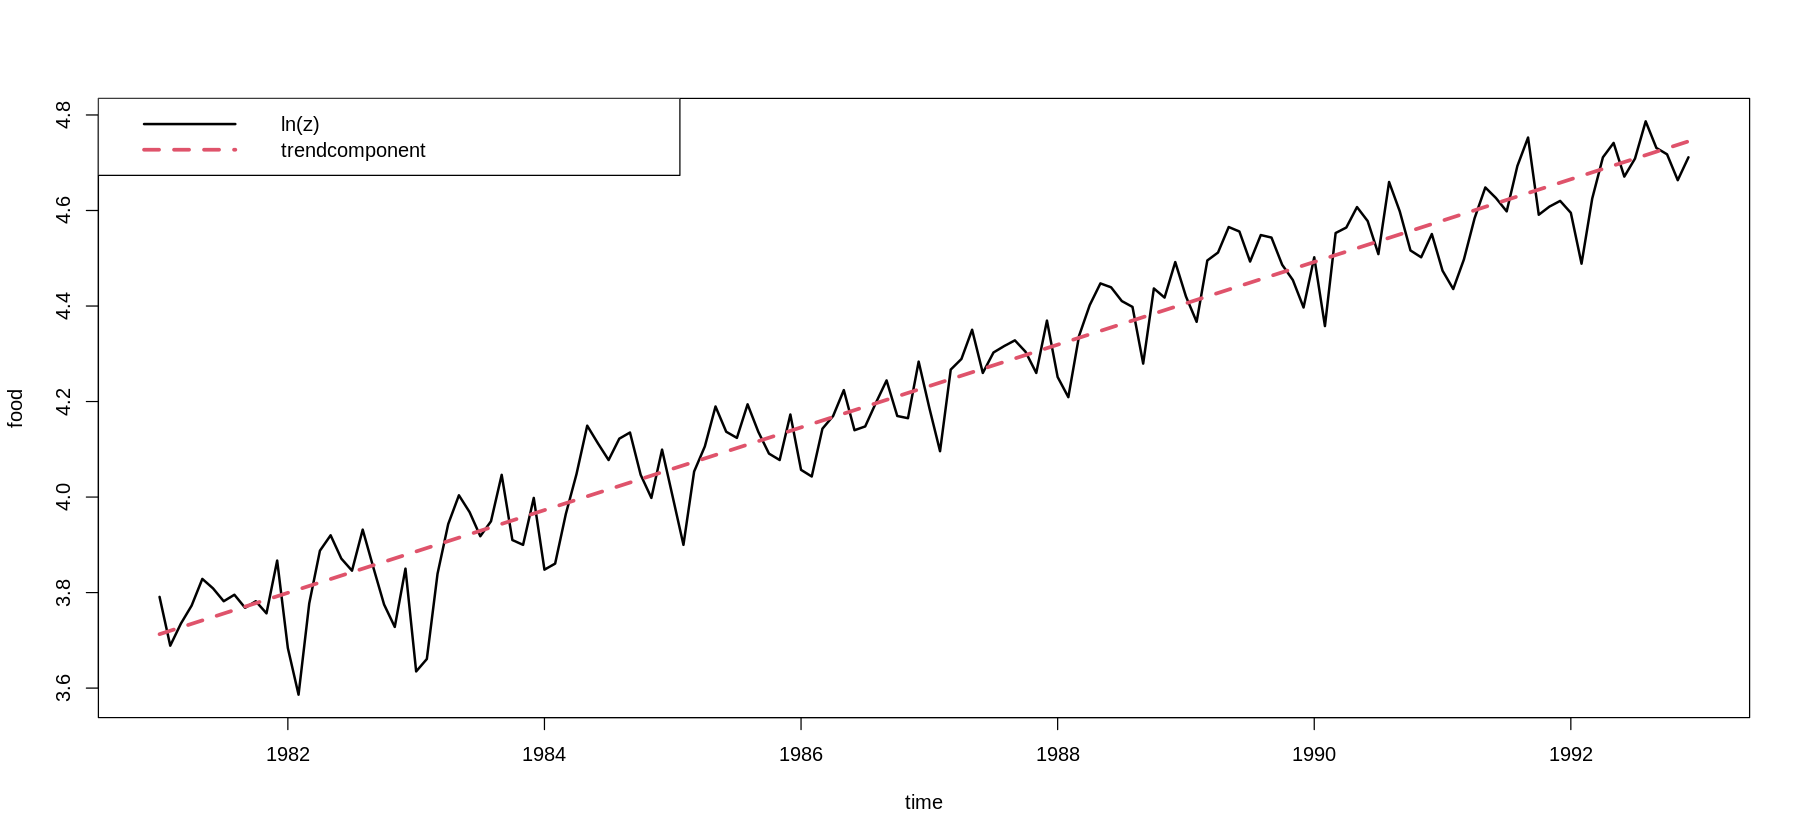

In [10]:
hat_Tt=fitted(fit)
ts.plot(log_food,hat_Tt,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:2,lwd=2:3,c("ln(z)","trendcomponent"))

###2.계절성분추정
$Z_t-T̂_t=δ_1I_1+δ_2I_2+...+δ_12I_{12}+ϵ_t$.적합

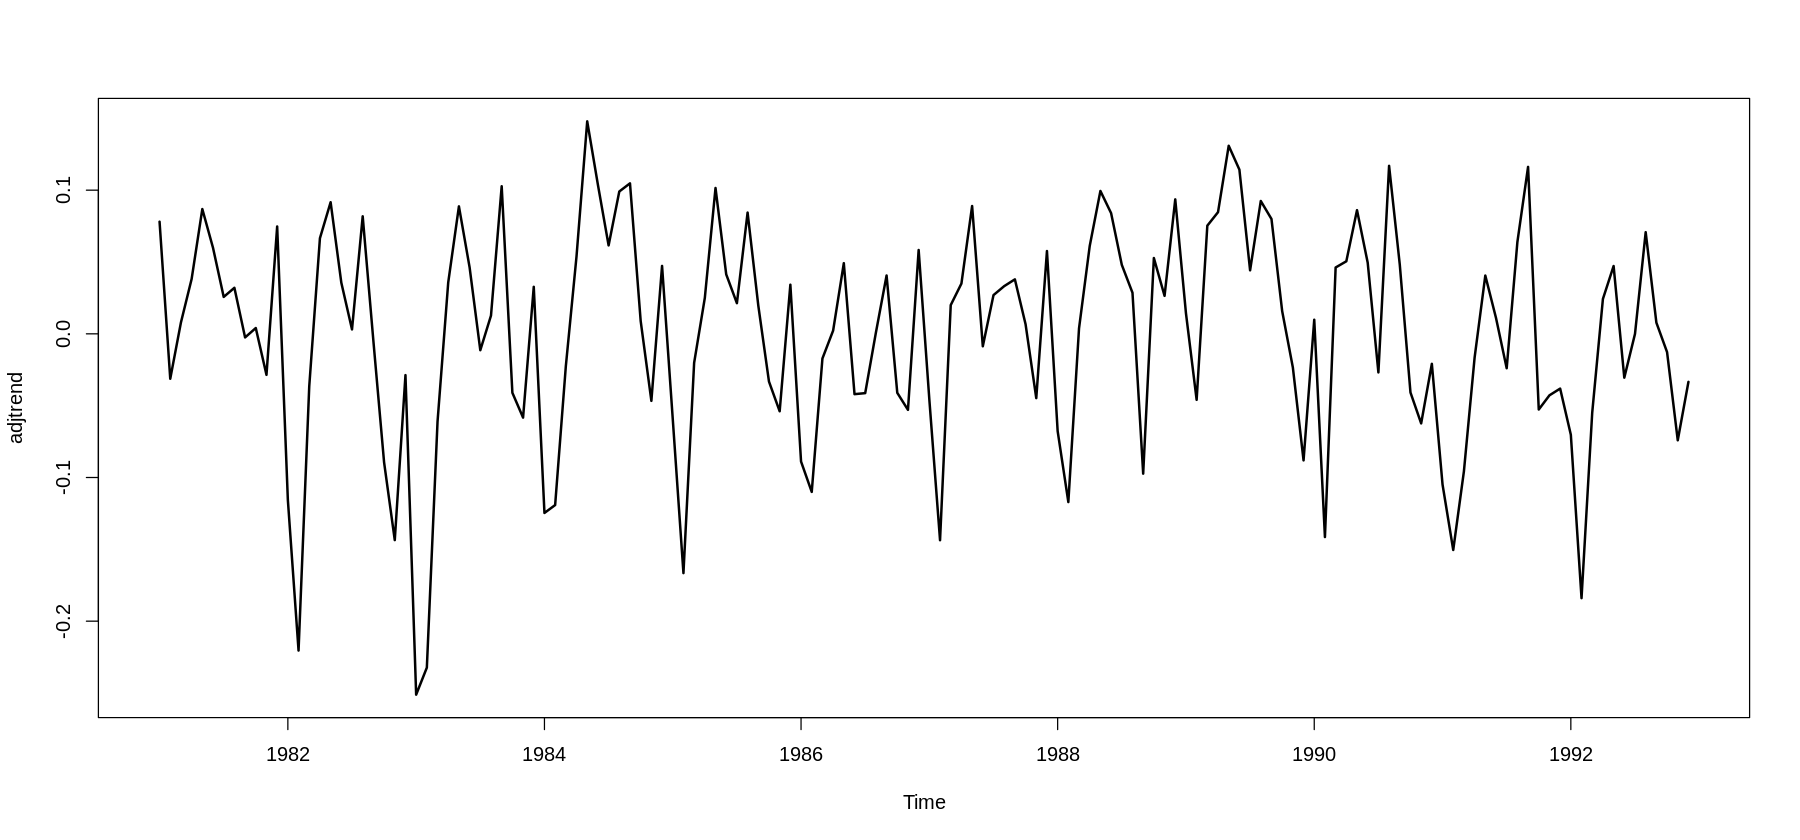

In [12]:
##원 시계열에서 추세성분 조정
adjtrend=log_food-hat_Tt
plot.ts(adjtrend,lwd=2)

In [13]:
## 지시함수를 이용한 계절성분 추정
y=factor(cycle(adjtrend)) ###범주형 변수로 변환

fit1=lm(adjtrend~0+y)
summary(fit1)


Call:
lm(formula = adjtrend ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.182321 -0.028501  0.000597  0.025663  0.146887 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1  -0.06883    0.01423  -4.837 3.61e-06 ***
y2  -0.13853    0.01423  -9.735  < 2e-16 ***
y3  -0.01290    0.01423  -0.907 0.366289    
y4   0.03840    0.01423   2.699 0.007872 ** 
y5   0.08825    0.01423   6.201 6.69e-09 ***
y6   0.03871    0.01423   2.720 0.007401 ** 
y7   0.01061    0.01423   0.746 0.457221    
y8   0.05972    0.01423   4.197 4.94e-05 ***
y9   0.03776    0.01423   2.653 0.008945 ** 
y10 -0.01856    0.01423  -1.304 0.194518    
y11 -0.05041    0.01423  -3.542 0.000549 ***
y12  0.01577    0.01423   1.108 0.269816    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0493 on 132 degrees of freedom
Multiple R-squared:  0.6172,	Adjusted R-squared:  0.5824 
F-statistic: 17.73 on 12 and 132 DF,  p-value: < 2.2e-16


- 계절 성분 추정
- $Ŝ_t=-0.069I_1-0.139I_2+...+0.016I_{12}$

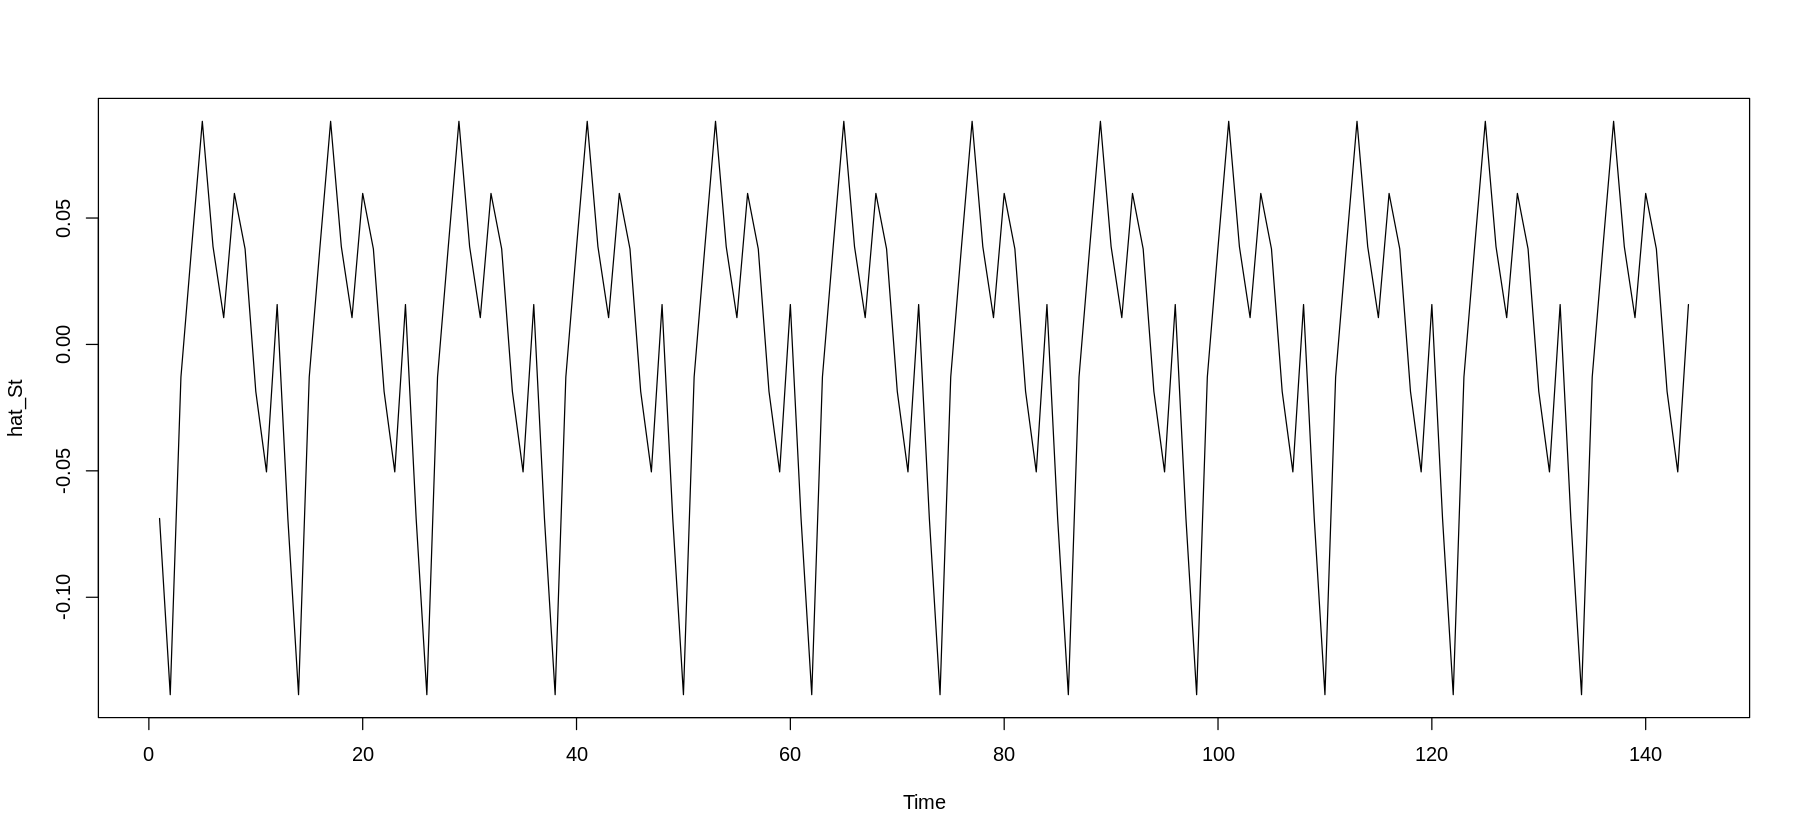

In [15]:
hat_St=fitted(fit1)
ts.plot(hat_St)

- 추정된 계절성분

### 3.불규칙 성분
$Î_t=Z_t-T̂_t-Ŝ_t$

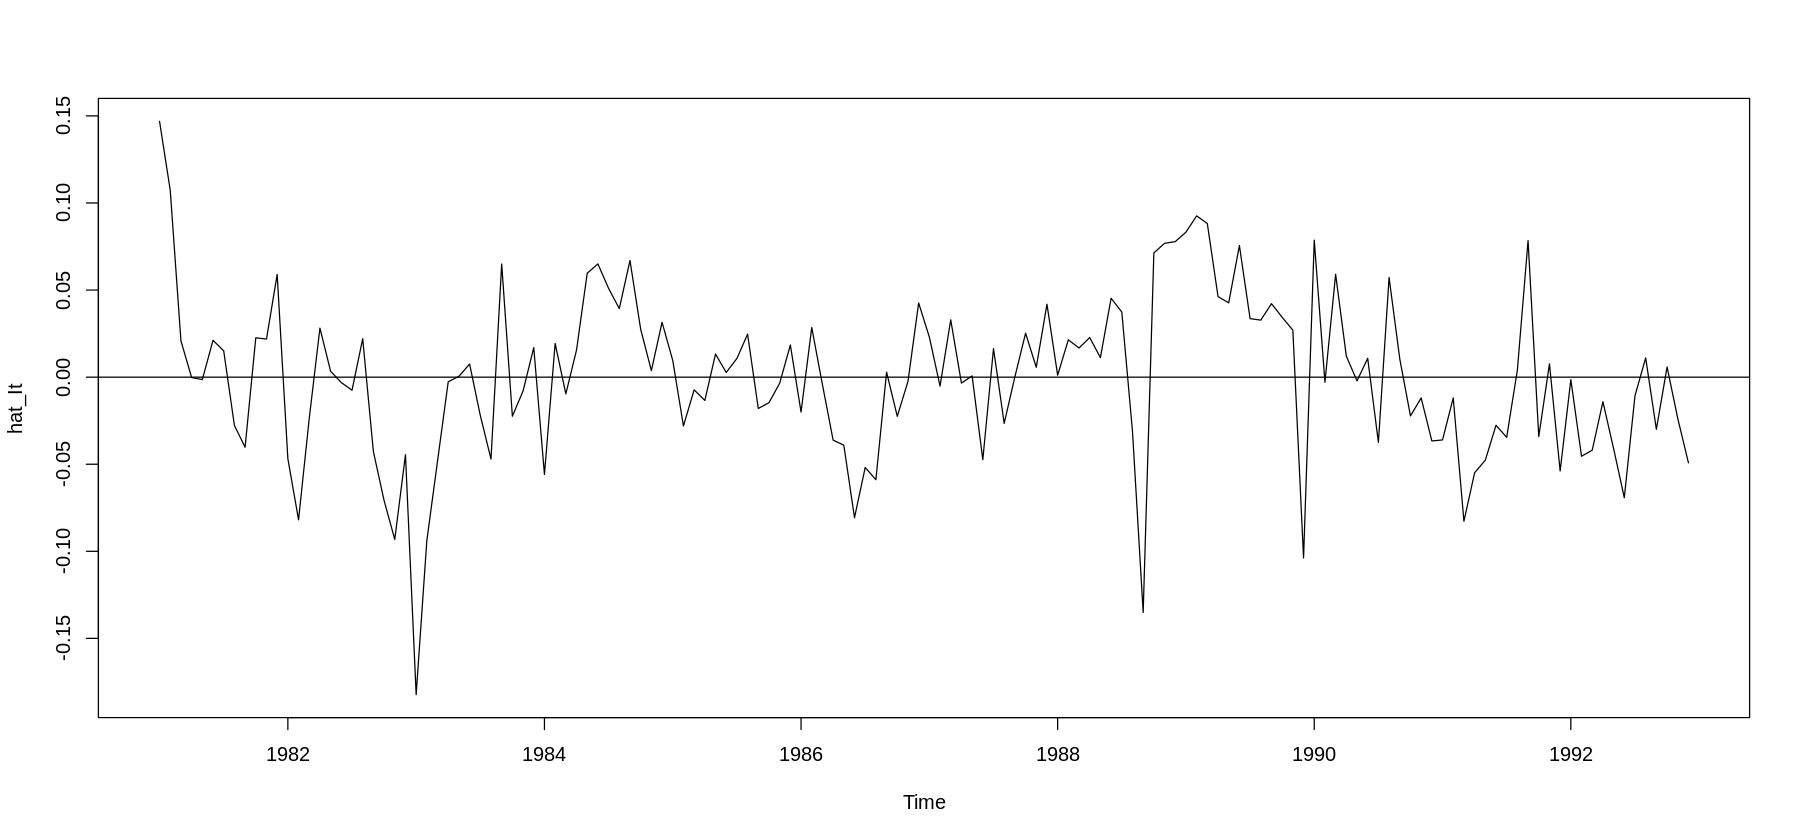

In [16]:
hat_It=log_food-hat_Tt-hat_St
ts.plot(hat_It)
abline(h=0)

##### 잔차(불규칙성분)에 대한 확인!
- 이분산성 : bptest
- 평균이 0인가 : t.test

In [17]:
bptest(fit1)


	studentized Breusch-Pagan test

data:  fit1
BP = 19.491, df = 11, p-value = 0.05283


- p-value가 크므로 영가설을 기각하지 못함

In [19]:
t.test(hat_It) #H_0:mu=E(It)=0


	One Sample t-test

data:  hat_It
t = 5.8812e-16, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 -0.007801616  0.007801616
sample estimates:
 mean of x 
2.3212e-18 


- p-value가 크므로 영가설을 기각하지 못함

### 4.추정
$Ẑ_t=T̂_t+Ŝ_t$

-> 체계적 성분들

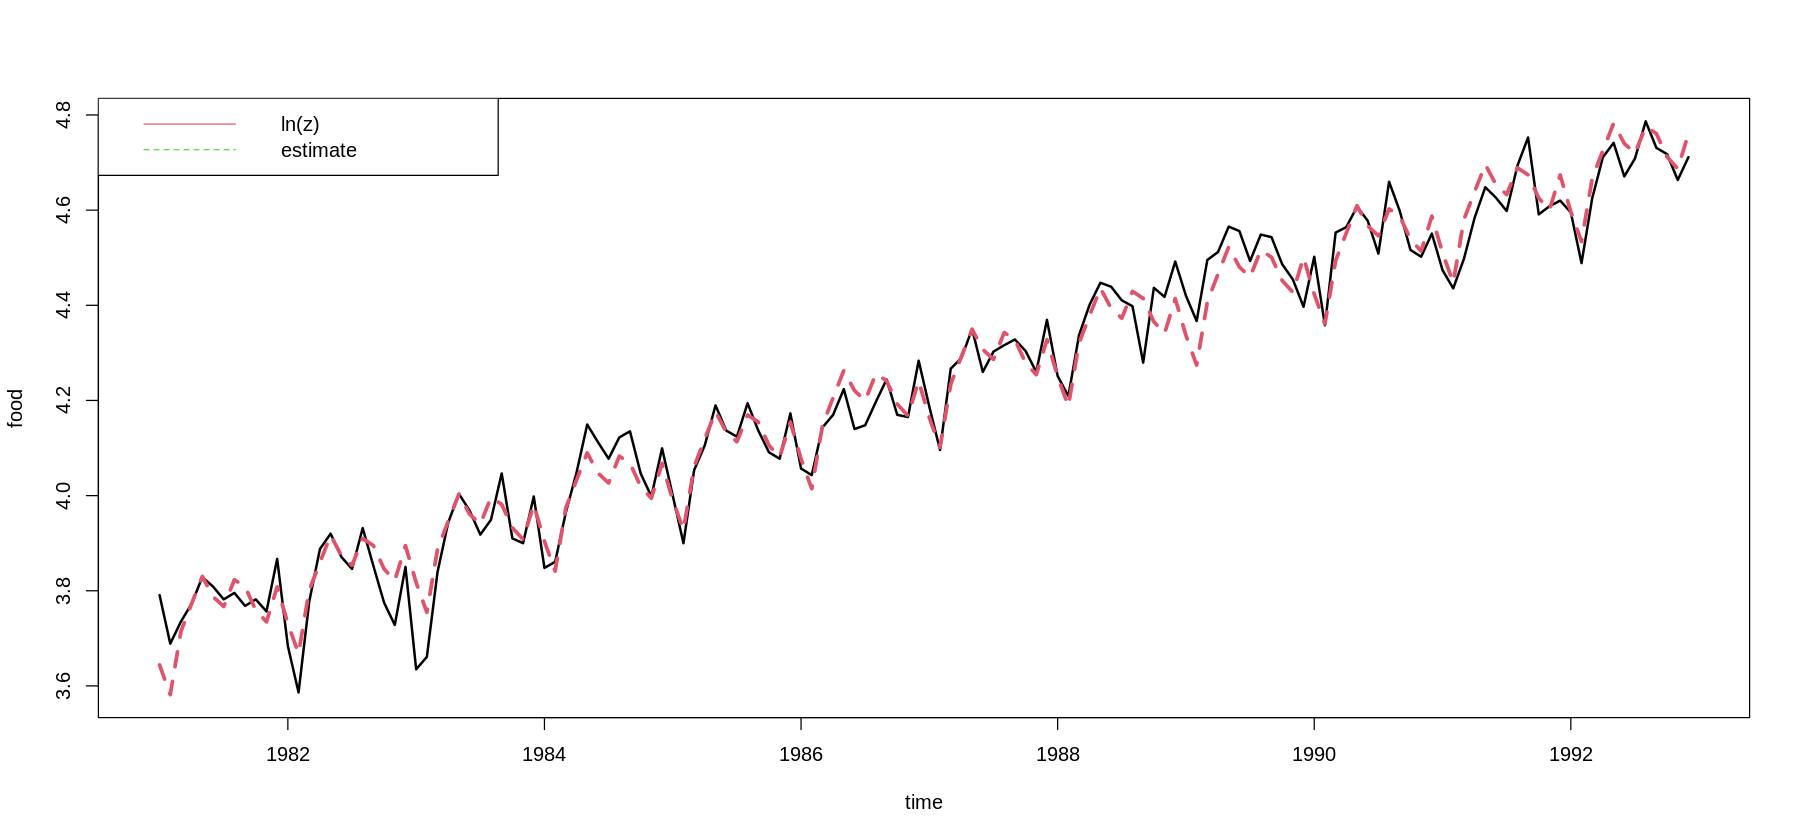

In [21]:
pred_a=hat_Tt+hat_St
ts.plot(log_food,pred_a,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food")
## ts.plot은 ts데이터 여러개를 넣어도 한번에 알아서 그려줌
legend("topleft",lty=1:2,col=2:3,c("ln(z)","estimate"))

- log변환한 시계열과 분해법에 의한 추정값

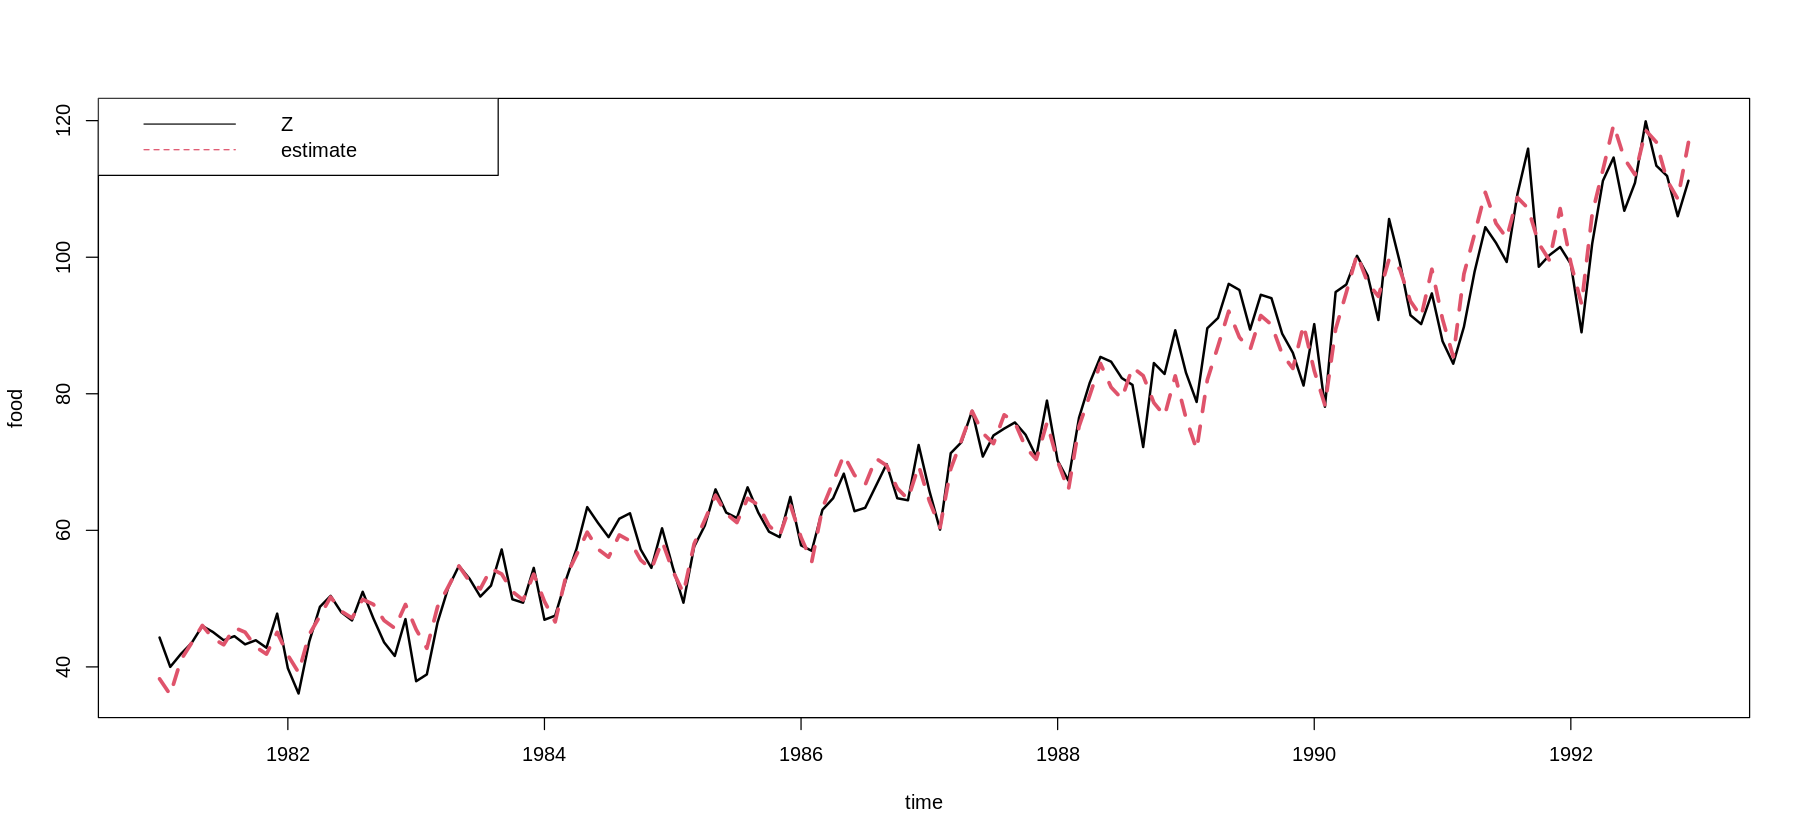

In [23]:
ts.plot(food,exp(pred_a),col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:2,c("Z","estimate"))

- 원 시계열데이터와 그에따른 추정값

#### **주의 해야할점**
- 원래의 이분산성이 존재하는 데이터와 추정값을 비교하려면 log변환하여 추정했던 데이터도 지수함수로 변환하여 원함수 처럼 변경하여 비교해야함!!!

In [24]:
length(food)

[1] 144

In [28]:
SSE=sum((food-exp(pred_a))^2)
MSE1=sum((food-exp(pred_a))^2)/length(food)
MSE2=mean((food-exp(pred_a))^2) ##MSE1과 동일. 그냥 평균을 계산하는 것이 데이터 개수에 따라 헷갈리지 않고 더 좋음
SSE
MSE1
MSE2

[1] 1636.88

[1] 11.36722

[1] 11.36722

## 추세를 이용한 분해법 - 승법 모형
- $Z_t=T_t*S_t*I_t$   계절주기 : s



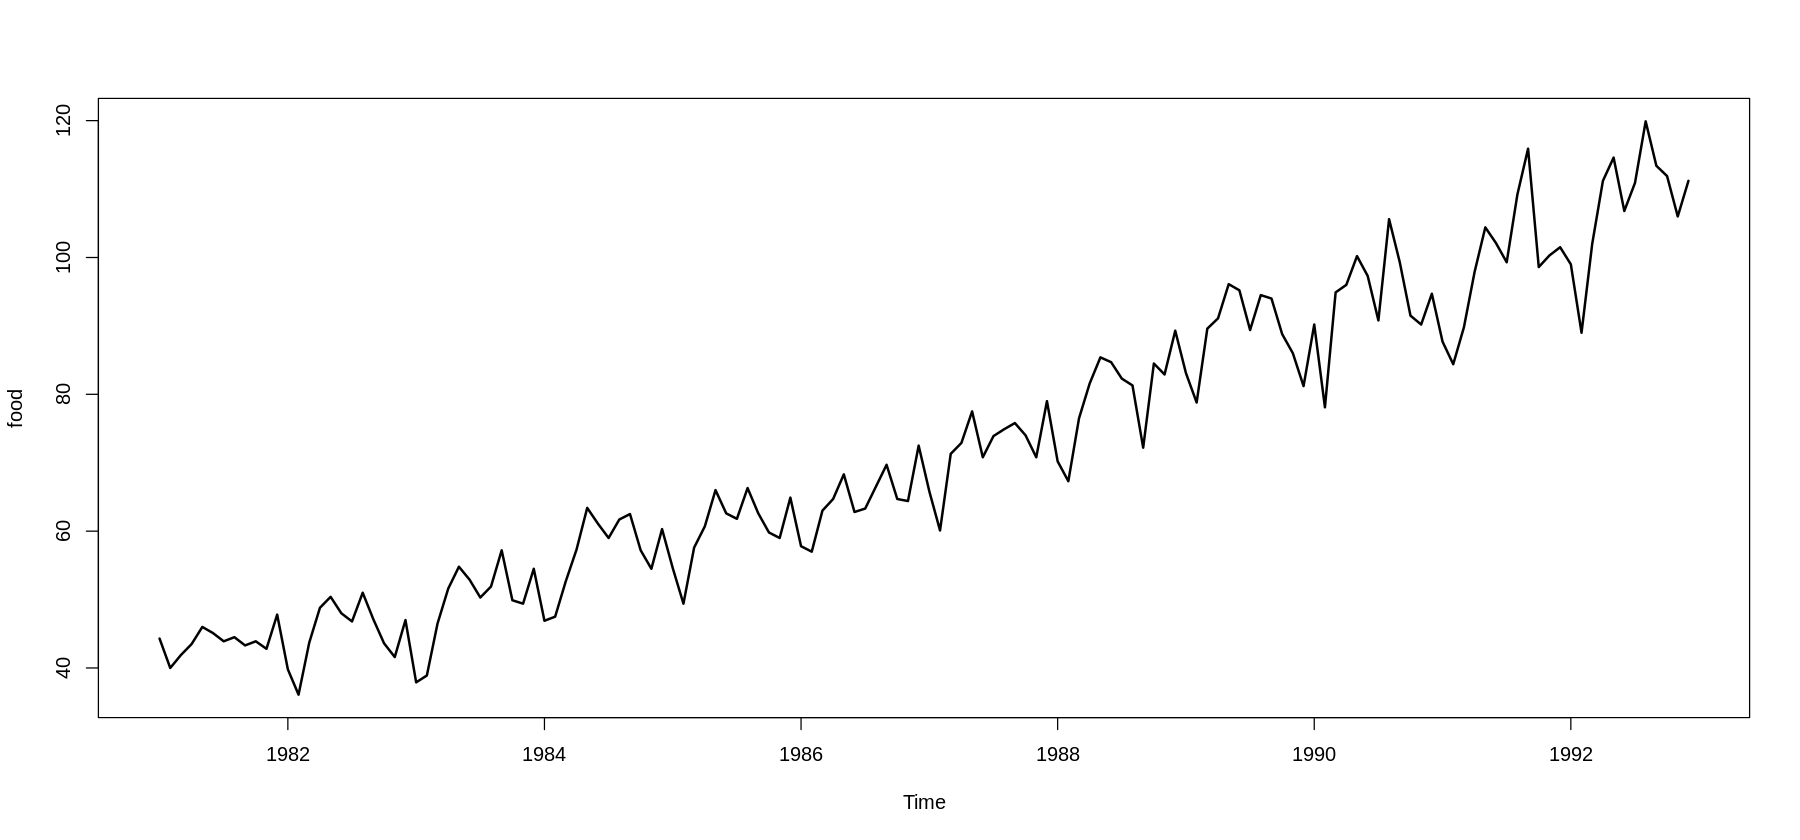

In [29]:
plot.ts(food,lwd=2)

###1.추세성분 추정
- $Z_t=β_0+β_1t+ϵ_t$ 적합

In [30]:
## 추세성분 추정
fit3=lm(food~t)
summary(fit3)


Call:
lm(formula = food ~ t)

Residuals:
     Min       1Q   Median       3Q      Max 
-14.0331  -3.4505  -0.1355   4.2911  15.3948 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 35.28614    0.95561   36.92   <2e-16 ***
t            0.50557    0.01143   44.21   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.704 on 142 degrees of freedom
Multiple R-squared:  0.9323,	Adjusted R-squared:  0.9318 
F-statistic:  1955 on 1 and 142 DF,  p-value: < 2.2e-16


- $T̂_t=35.286+0.506t$

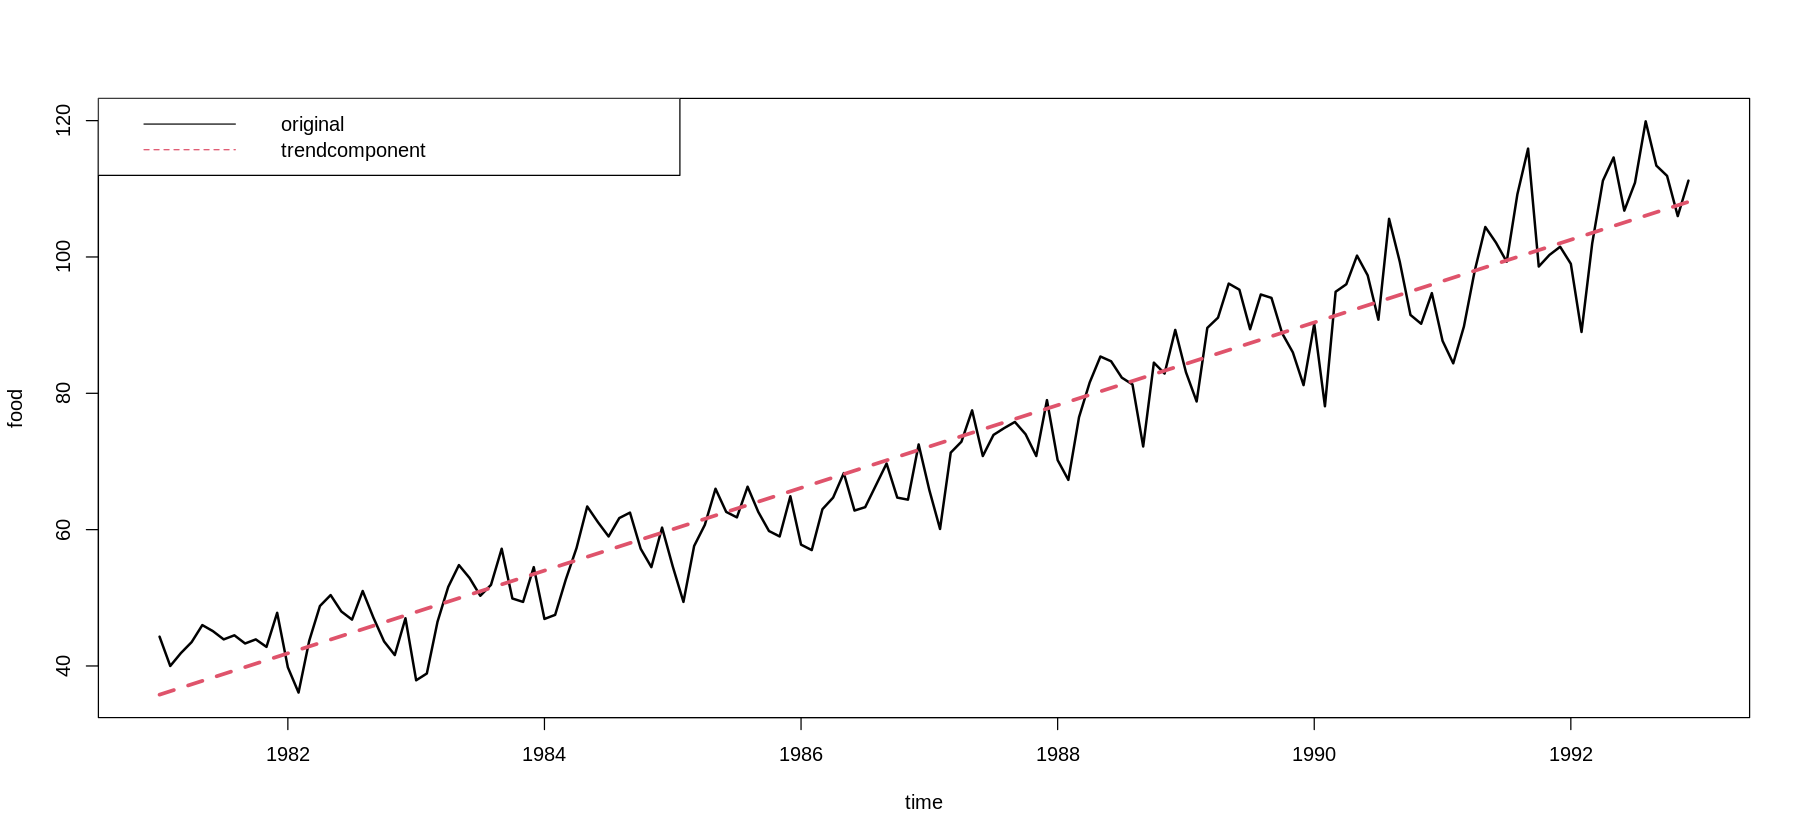

In [31]:
ts.plot(food,fitted(fit3),col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:2,c("original","trendcomponent"))

- 원 시계열과 분해법에 의한 추세성분

In [33]:
fit4=lm(food~t+I(t^2)) ##제곱항 추가
summary(fit4)


Call:
lm(formula = food ~ t + I(t^2))

Residuals:
    Min      1Q  Median      3Q     Max 
-16.845  -3.535   0.566   3.523  13.391 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 4.011e+01  1.346e+00  29.799  < 2e-16 ***
t           3.071e-01  4.286e-02   7.166 3.96e-11 ***
I(t^2)      1.369e-03  2.863e-04   4.779 4.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 5.31 on 141 degrees of freedom
Multiple R-squared:  0.9417,	Adjusted R-squared:  0.9409 
F-statistic:  1139 on 2 and 141 DF,  p-value: < 2.2e-16


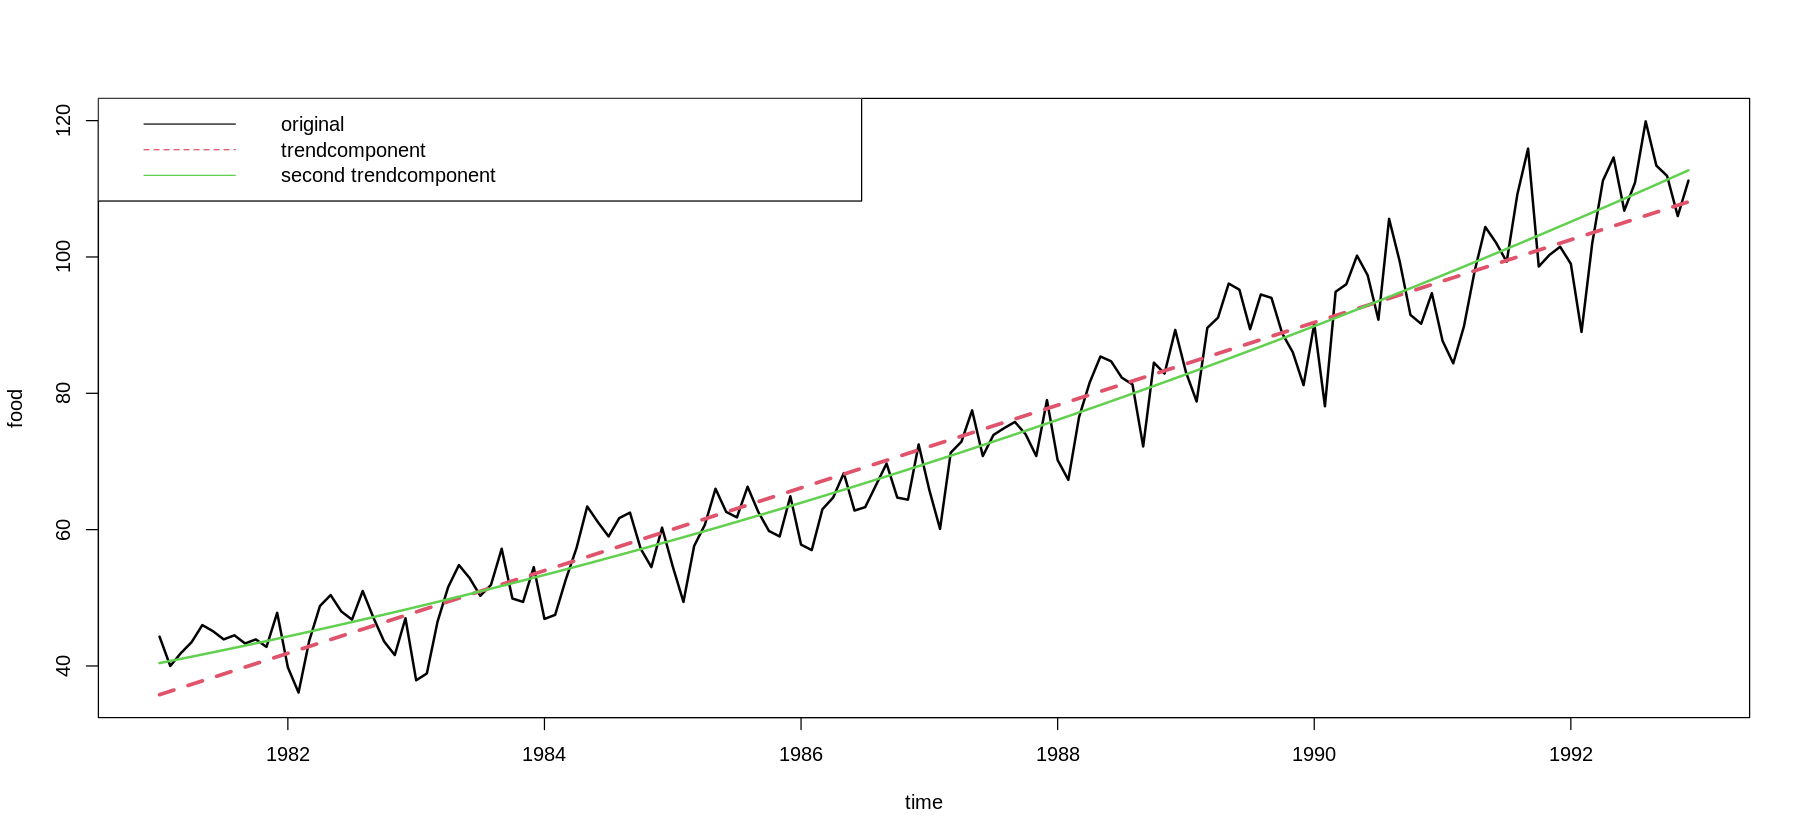

In [34]:
ts.plot(food,fitted(fit3),fitted(fit4),col=1:3,lty=1:2,lwd=2:3,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:3,c("original","trendcomponent","second trendcomponent"))

### 2.계절성분 추정
$Z_t/T̂_t=δ_1I_1+δ_2I_2+...+δ_{12}I_{12}+ϵ_t$.  적합

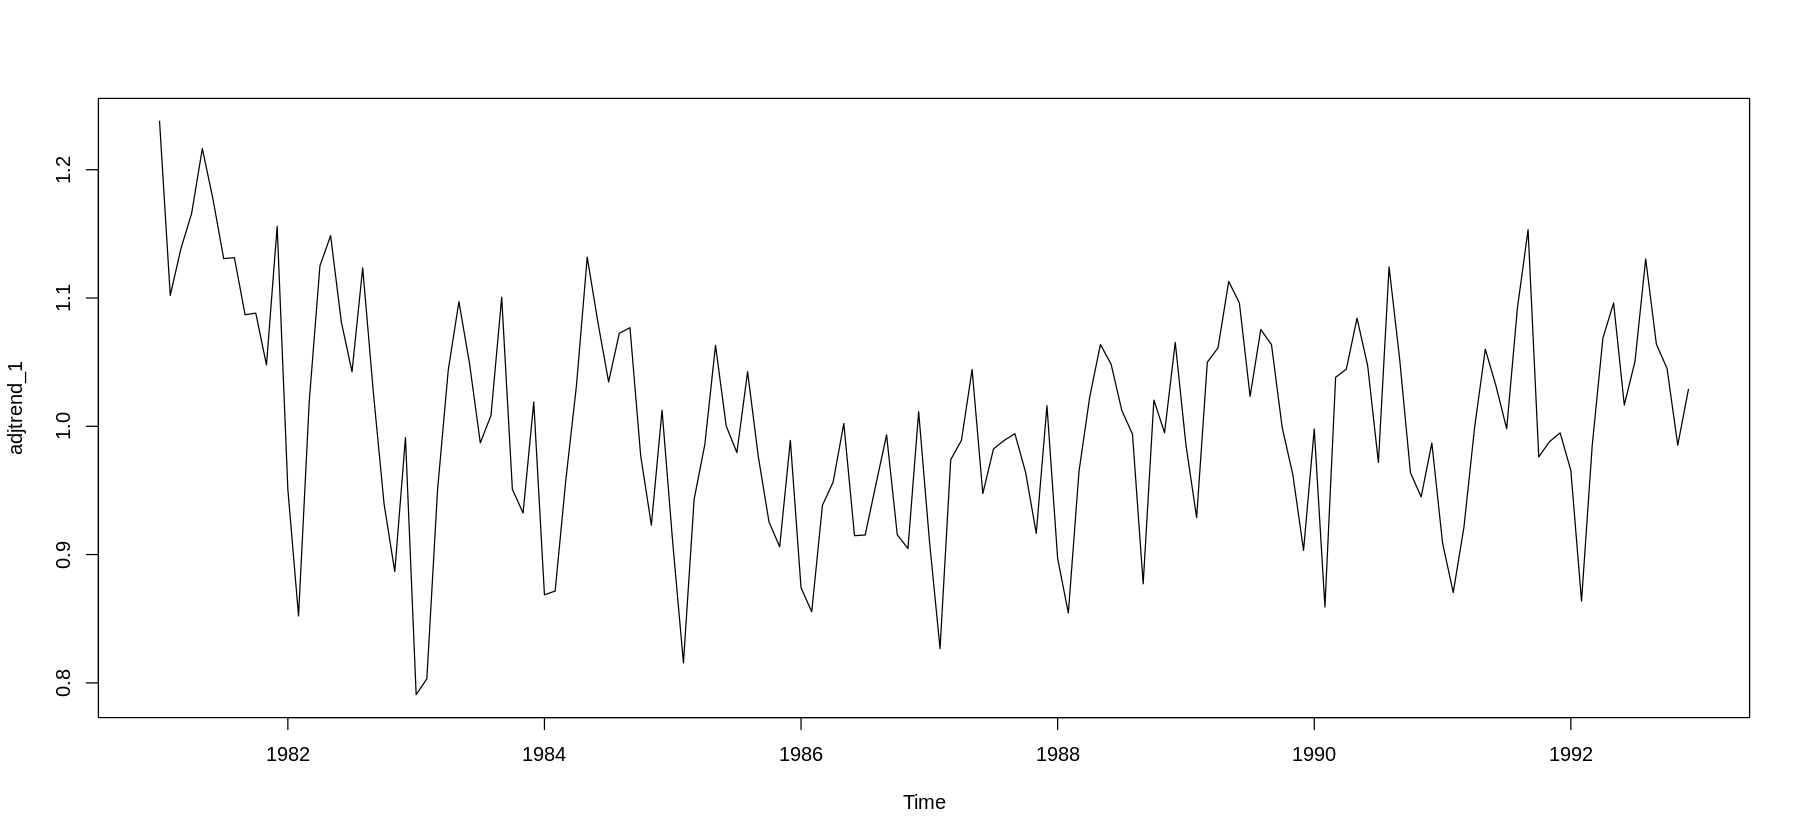

In [35]:
## 원 시계열에서 추세성분 조정
trend_1=fitted(fit3)
adjtrend_1=food/trend_1
plot.ts(adjtrend_1)

- 약간 곡선형으로 휘어져있음을 알 수 있음

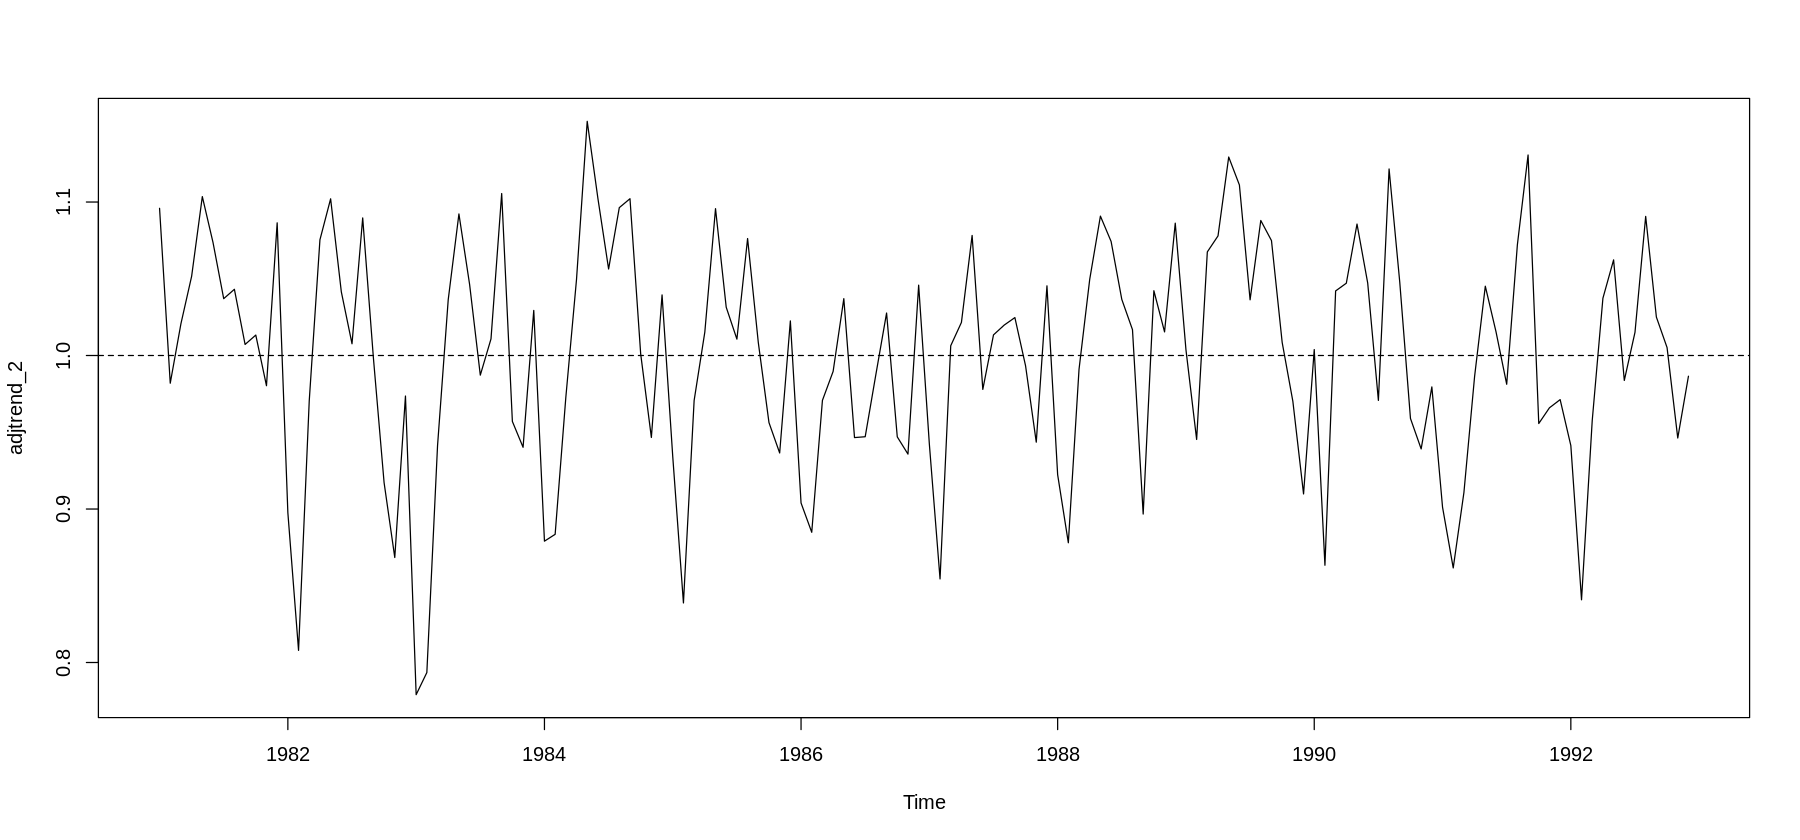

In [36]:
##원 시계열에서 2차 추세성분 조정
trend_2=fitted(fit4)
adjtrend_2=food/trend_2
plot.ts(adjtrend_2)
abline(h=1,lty=2)

- 승법모형은 평균이 1임 -> 나누어 주어야 함으로..

In [37]:
## 지시함수를 이용한 계절성분 추정
y=factor(cycle(adjtrend_2))
fit5=lm(adjtrend_2~0+y)
summary(fit5)


Call:
lm(formula = adjtrend_2 ~ 0 + y)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.154659 -0.027736  0.000622  0.028345  0.162186 

Coefficients:
    Estimate Std. Error t value Pr(>|t|)    
y1   0.93372    0.01368   68.23   <2e-16 ***
y2   0.86951    0.01368   63.54   <2e-16 ***
y3   0.98517    0.01368   72.00   <2e-16 ***
y4   1.03650    0.01368   75.75   <2e-16 ***
y5   1.08954    0.01368   79.62   <2e-16 ***
y6   1.03763    0.01368   75.83   <2e-16 ***
y7   1.00829    0.01368   73.69   <2e-16 ***
y8   1.05940    0.01368   77.42   <2e-16 ***
y9   1.03744    0.01368   75.82   <2e-16 ***
y10  0.97966    0.01368   71.59   <2e-16 ***
y11  0.94903    0.01368   69.35   <2e-16 ***
y12  1.01466    0.01368   74.15   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0474 on 132 degrees of freedom
Multiple R-squared:  0.998,	Adjusted R-squared:  0.9978 
F-statistic:  5359 on 12 and 132 DF,  p-value: < 2.2e-16


- $Ŝ_t=0.934I_1+0.870I_2+...+1.015I_{12}$

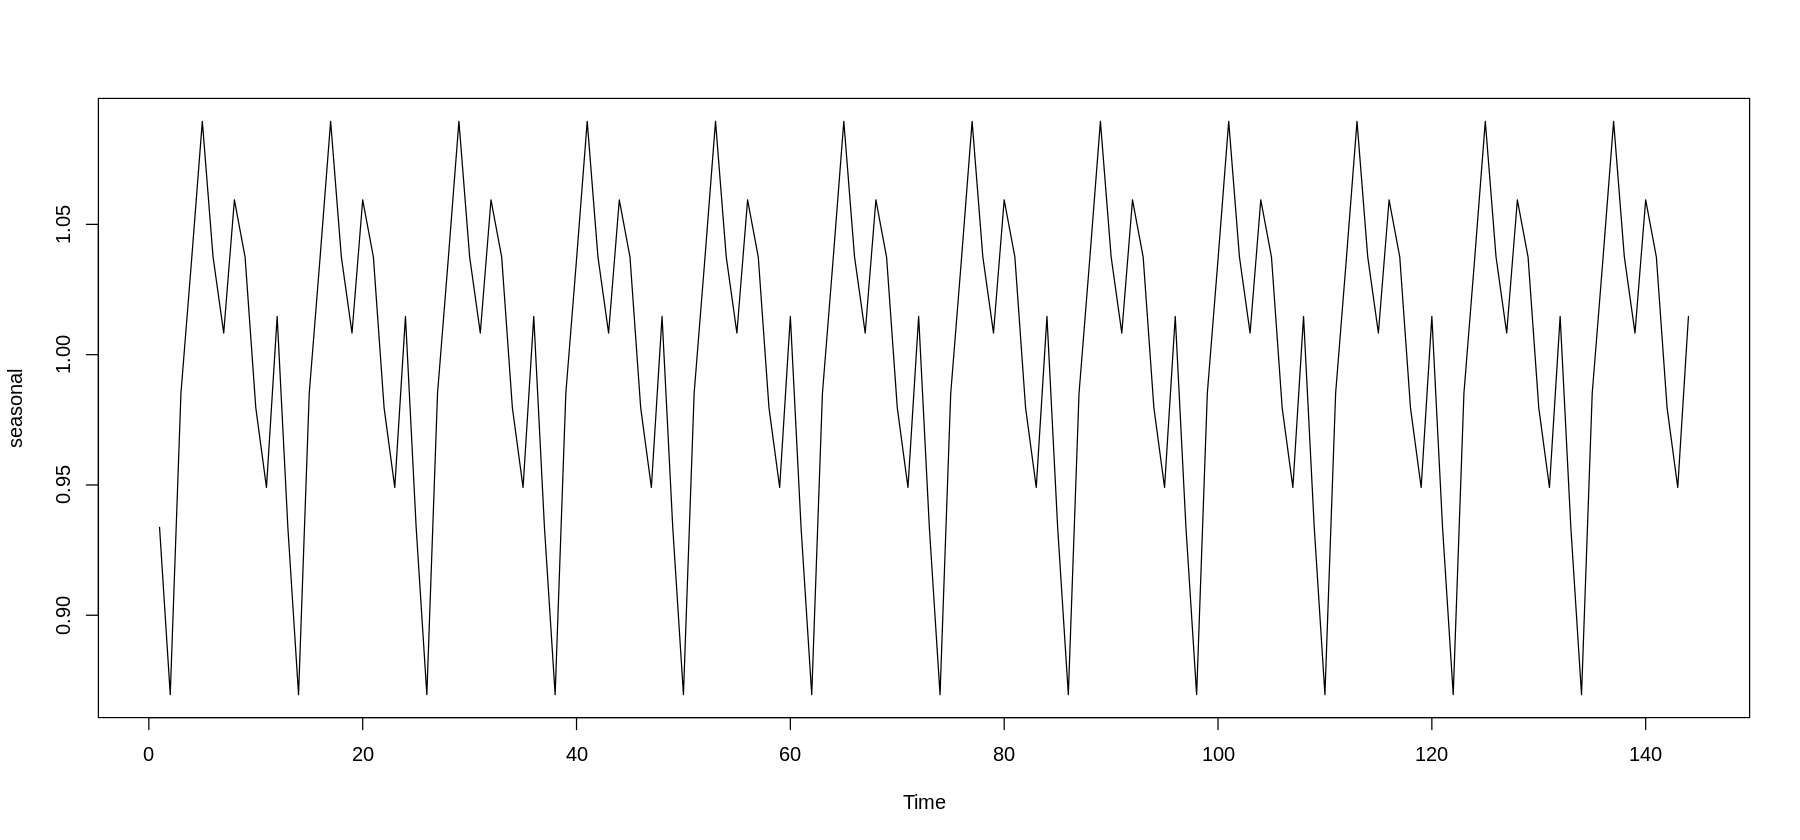

In [39]:
seasonal=fitted(fit5)
ts.plot(seasonal)

- 추정된 계절성분

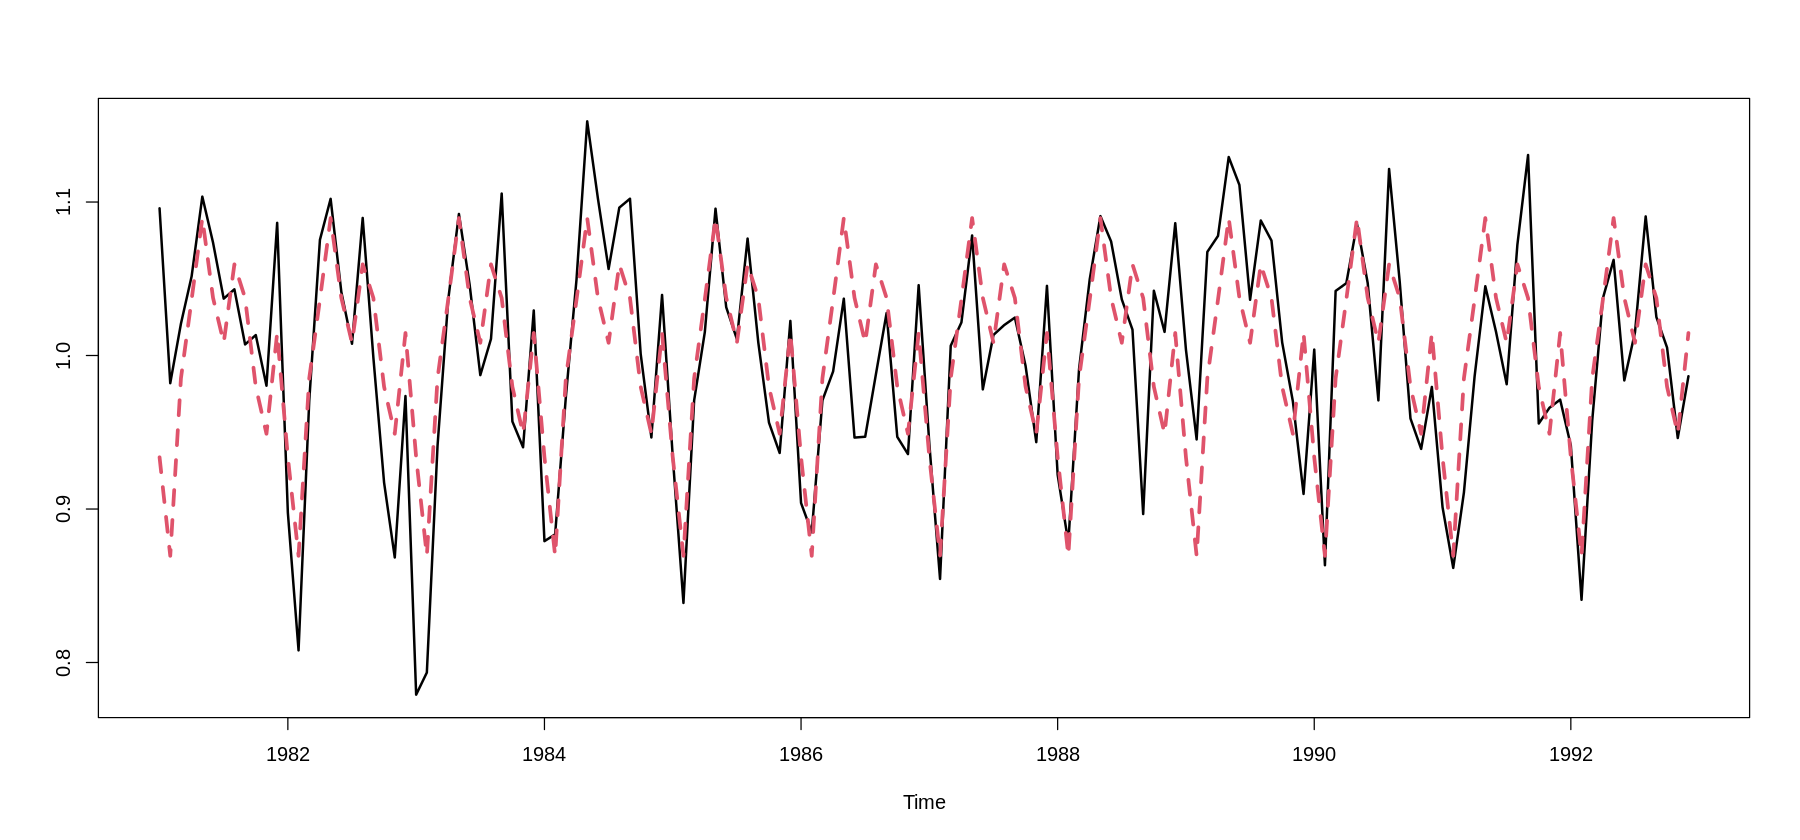

In [40]:
seasonal=fitted(fit5)
ts.plot(adjtrend_2,seasonal,col=1:2,lty=1:2,lwd=2:3)

- 추세조정된 시계열과 추정된 계절성분

### 3. 불규칙성분
$Î_t=Z_t/(T̂_t * Ŝ_t)$

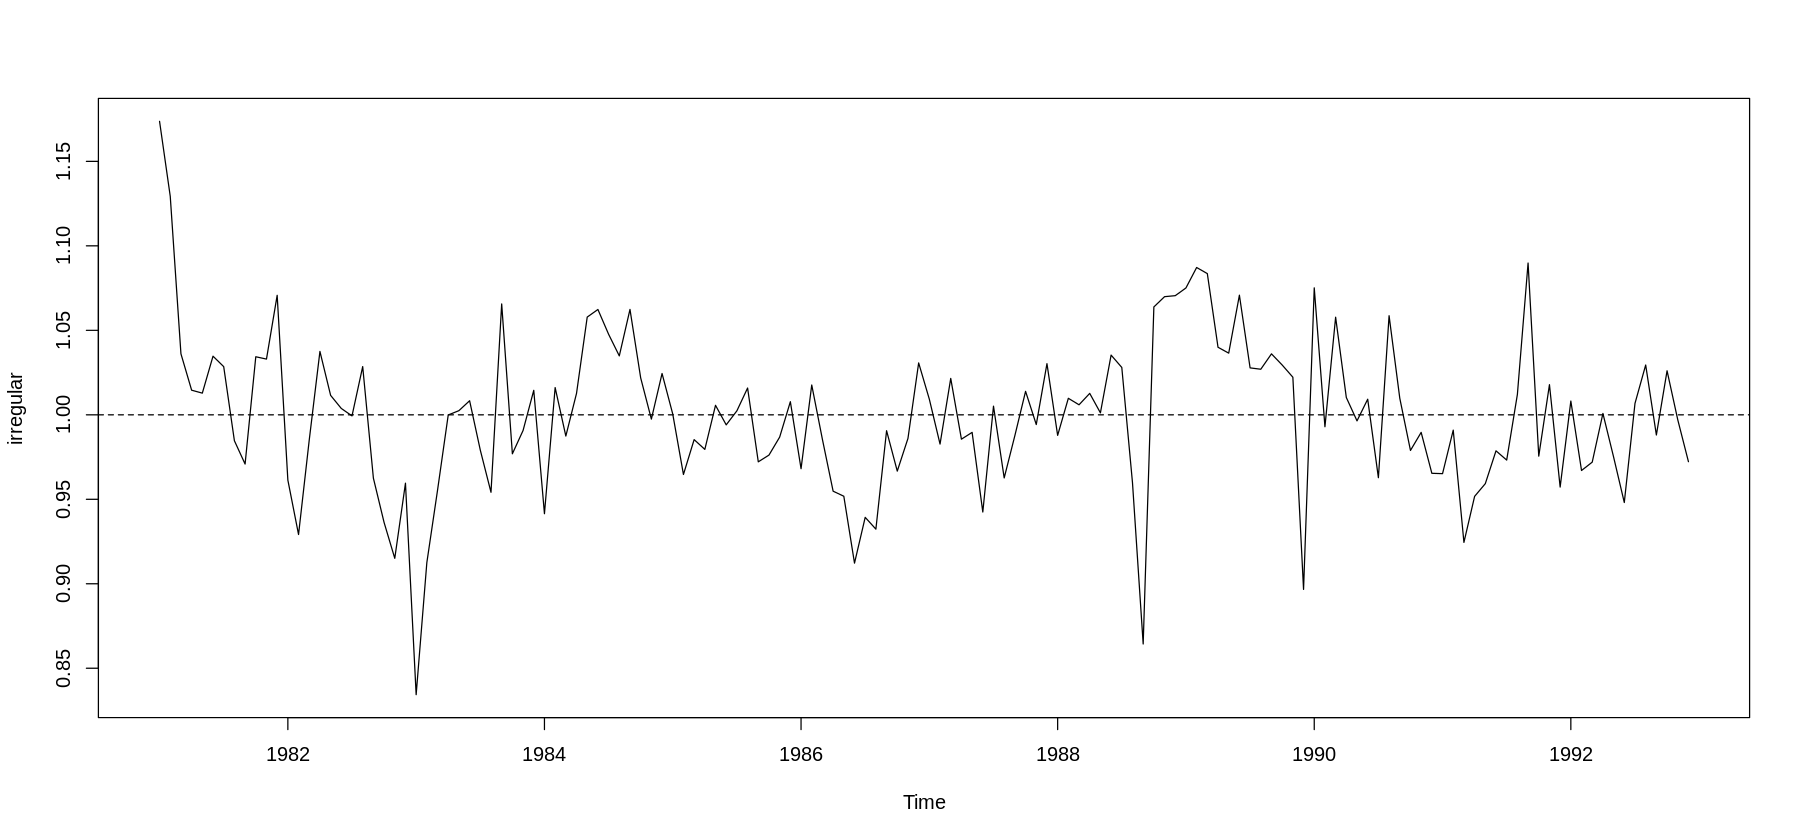

In [42]:
irregular=food/(trend_2*seasonal)
ts.plot(irregular)
abline(h=1,lty=2)

##### 잔차(불규칙성분)에 대한 확인!
- 이분산성 : bptest
- 평균이 1인가 : t.test (승법모형이므로)

In [45]:
bptest(fit5)


	studentized Breusch-Pagan test

data:  fit5
BP = 17.124, df = 11, p-value = 0.1043


In [43]:
t.test(irregular,mu=1)


	One Sample t-test

data:  irregular
t = 0, df = 143, p-value = 1
alternative hypothesis: true mean is not equal to 1
95 percent confidence interval:
 0.9923514 1.0076486
sample estimates:
mean of x 
        1 


### 4.추정
$Ẑ_t=T̂_t * Ŝ_t$

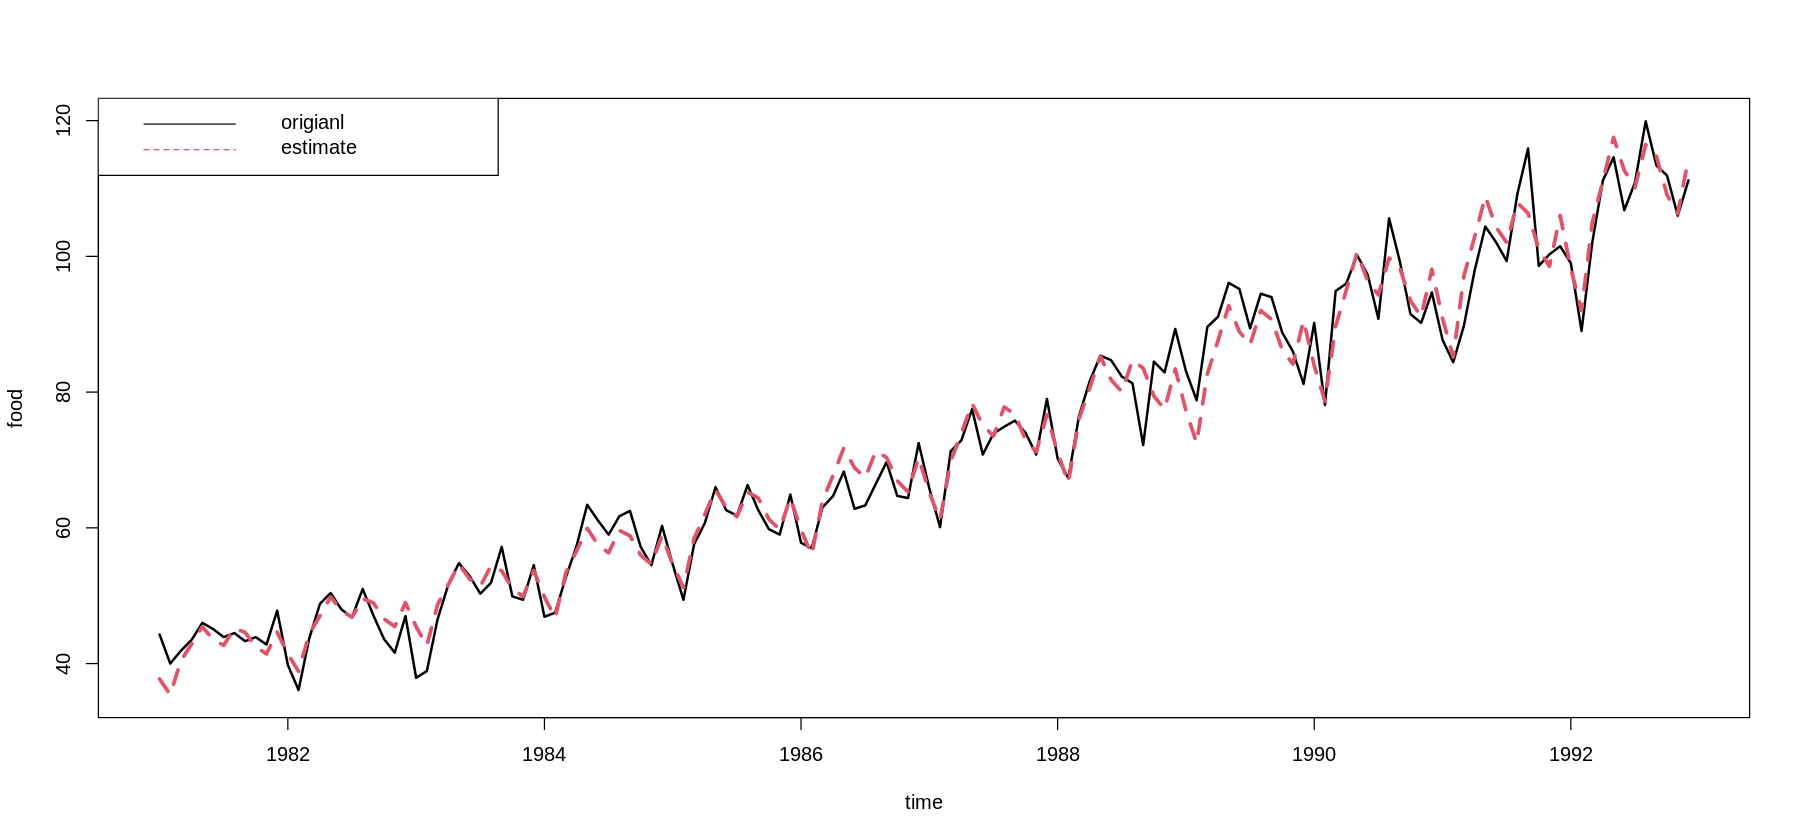

In [46]:
pred_m=trend_2*seasonal
ts.plot(food,pred_m,col=1:2,lty=1:2,lwd=2:3,xlab="time",ylab="food")
legend("topleft",lty=1:2,col=1:2,c("origianl","estimate"))

- 원 시계열과 분해법에 의한 추정값

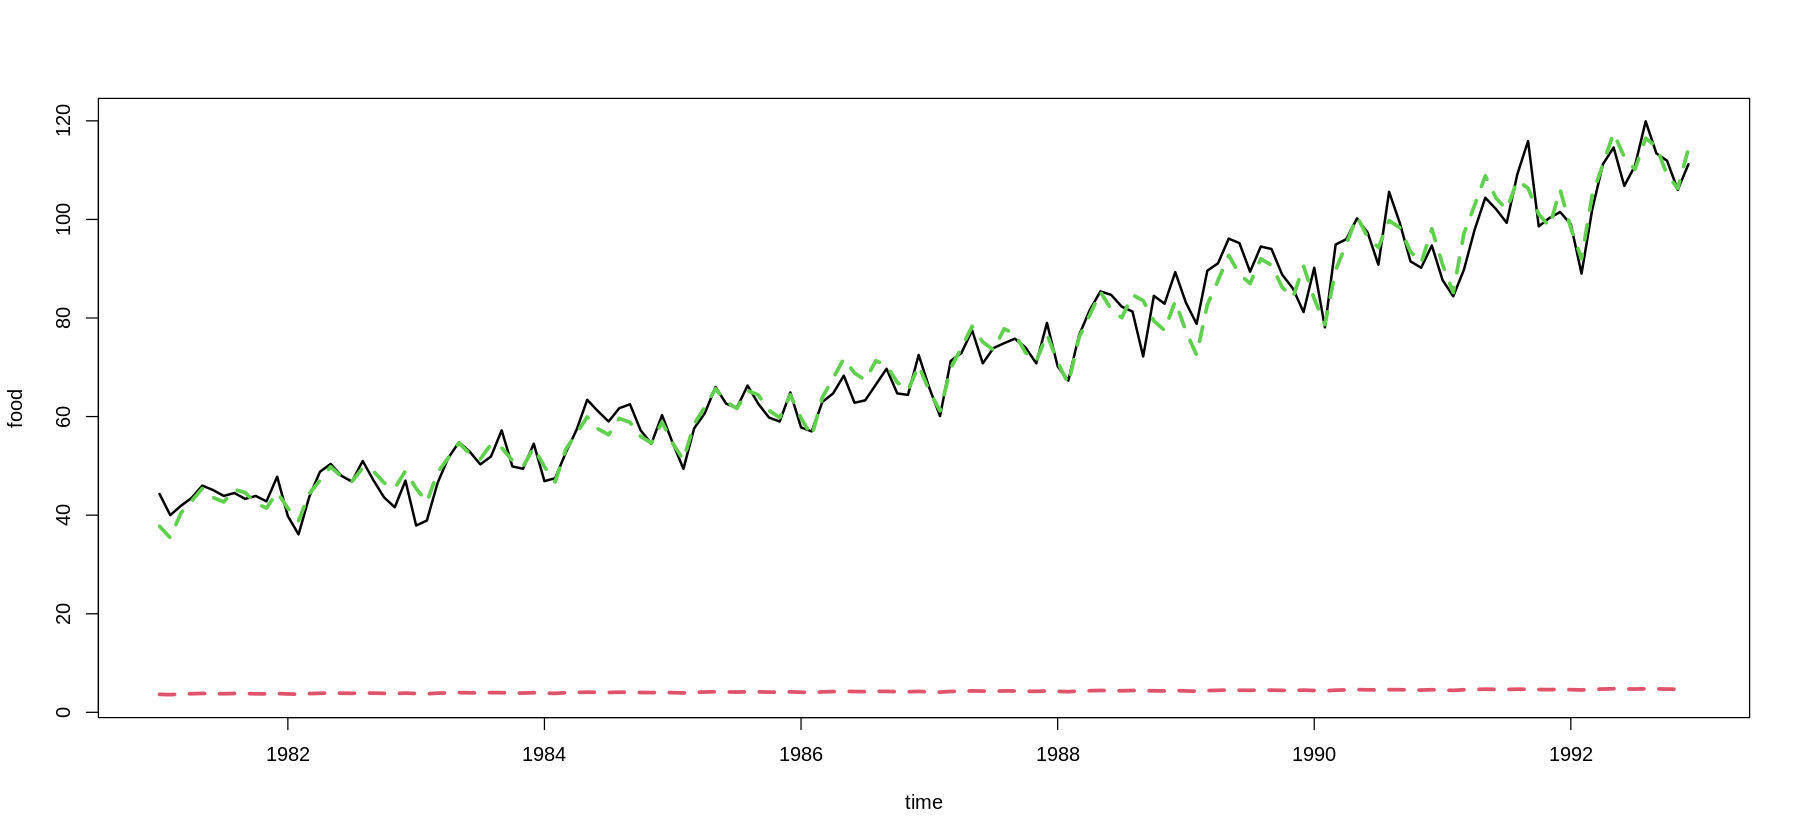

In [47]:
#pred_a ->가법
#pred_m ->승법
ts.plot(food,pred_a,pred_m,col=1:3,lty=c(1,2,2),lwd=c(2,3,3),xlab="time",ylab="food")

- 원 시계열과 분해법에 의한 추정값

In [49]:
##가법
sum((food-exp(pred_a))^2) ##SSE
mean((food-exp(pred_a))^2) ##MSE

[1] 1636.88

[1] 11.36722

In [51]:
##승법
sum((food-pred_m)^2) ##SSE
mean((food-pred_m)^2) ##MSE

[1] 1483.038

[1] 10.29888